In [68]:
import numpy as np
import matplotlib.pyplot as plt
path=r"C:\Users\johni\Desktop\physics\images\\"
from scipy.stats import chi2

#GIA THN ASKHSH OPOY A BAZO B KAI ANAPODA, GIATI TA EXEI ANAPODA STHN EKFONISI
#KAI OPOY PARABOLIKA ALLAZO A ME C GIATI PALI EINAI ANAPODA :p

#The standard variables
N=10
e=0.5

In [69]:
x=np.random.uniform(0, 10, size=N)
y=np.array([])
for value in x:
    y_value=np.random.normal(value, e)
    y=np.append(y,y_value)
print (x,y)

[4.28694328 5.3979375  0.67506547 4.27270681 2.7951904  4.16265017
 1.29714076 6.32783817 6.31366025 0.98748224] [ 4.17307825  5.38393541 -0.10613062  4.11609543  3.06528849  4.08691274
  1.64984166  6.21936138  5.74714711  2.13981127]


Linear Adjustment

In [61]:
# calculate the means of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)

# calculate the differences between each data point and the means of x and y
diff_x = x - x_mean
diff_y = y - y_mean

# calculate the product of the differences between x and y
prod_diff = diff_x * diff_y

# calculate the squared differences between x
sq_diff_x = (x - x_mean)**2

# calculate the slope b
b = np.sum(prod_diff) / np.sum(sq_diff_x)

# calculate the intercept a
a = y_mean - b * x_mean

# compute the predicted values y_pred
y_pred = a + b * x

# calculate the residual values
residual = y - y_pred

# calculate the sum of the squared residuals
sum_residuals = np.sum(residual**2)

# calculate the total sum of squares
tot_ss = np.sum((y - y_mean)**2)

# calculate the coefficient of determination (R-squared)
R_squared = 1 - (sum_residuals / tot_ss)

# print the slope, intercept, and R-squared
print("Slope: ", b)
print("Intercept: ", a)

Slope:  1.01953218083368
Intercept:  -0.061245366347853825


In [70]:
A=np.empty((0, 2), float)
B=y
for value in x:
    A=np.vstack([A,[value, 1]])
ata=np.transpose(A)@A
atb=np.transpose(A)@B

const=np.linalg.solve(ata, atb)

a=const[0]
b=const[1]
const

#Covariance of estimators

#s2 = np.sum((y - A @ const)**2) / (N - 2)  # residual variance estimate
#var_beta_hat = s2 * np.linalg.inv(A.T @ A)
#var_beta_hat

s2 = np.sum((y - A @ const)**2)  # sum of squared residuals
s = np.sqrt(s2 / (N-3))
std_beta_hat = s* np.sqrt(np.diag(np.linalg.inv(A.T @ A)))
SST = np.sum((y - np.mean(y))**2)  # total sum of squares
df_model = 1  # degrees of freedom for the model
df_resid = N - 2  # degrees of freedom for the residuals
chi2_min = s2 / df_resid  # chi-square minimum
p_value = 1 - chi2.cdf(chi2_min, df_resid)  # p-value


In [72]:
p_value

0.9999878285196662

Parabolic Adjustment

In [73]:
A=np.empty((0, 3), float)
B=y
for value in x:
    A=np.vstack([A,[value*value, value, 1]])
ata=np.transpose(A)@A
atb=np.transpose(A)@B

const2=np.linalg.solve(ata, atb)

a2=const2[0]
b2=const2[1]
c2=const2[2]

s2 = np.sum((y - A @ const2)**2) / (N - 3)  # residual variance estimate
var_beta_hat = s2 * np.linalg.inv(A.T @ A)
var_beta_hat


array([[ 0.00292625, -0.02029125,  0.02320064],
       [-0.02029125,  0.1479945 , -0.1875009 ],
       [ 0.02320064, -0.1875009 ,  0.31074925]])

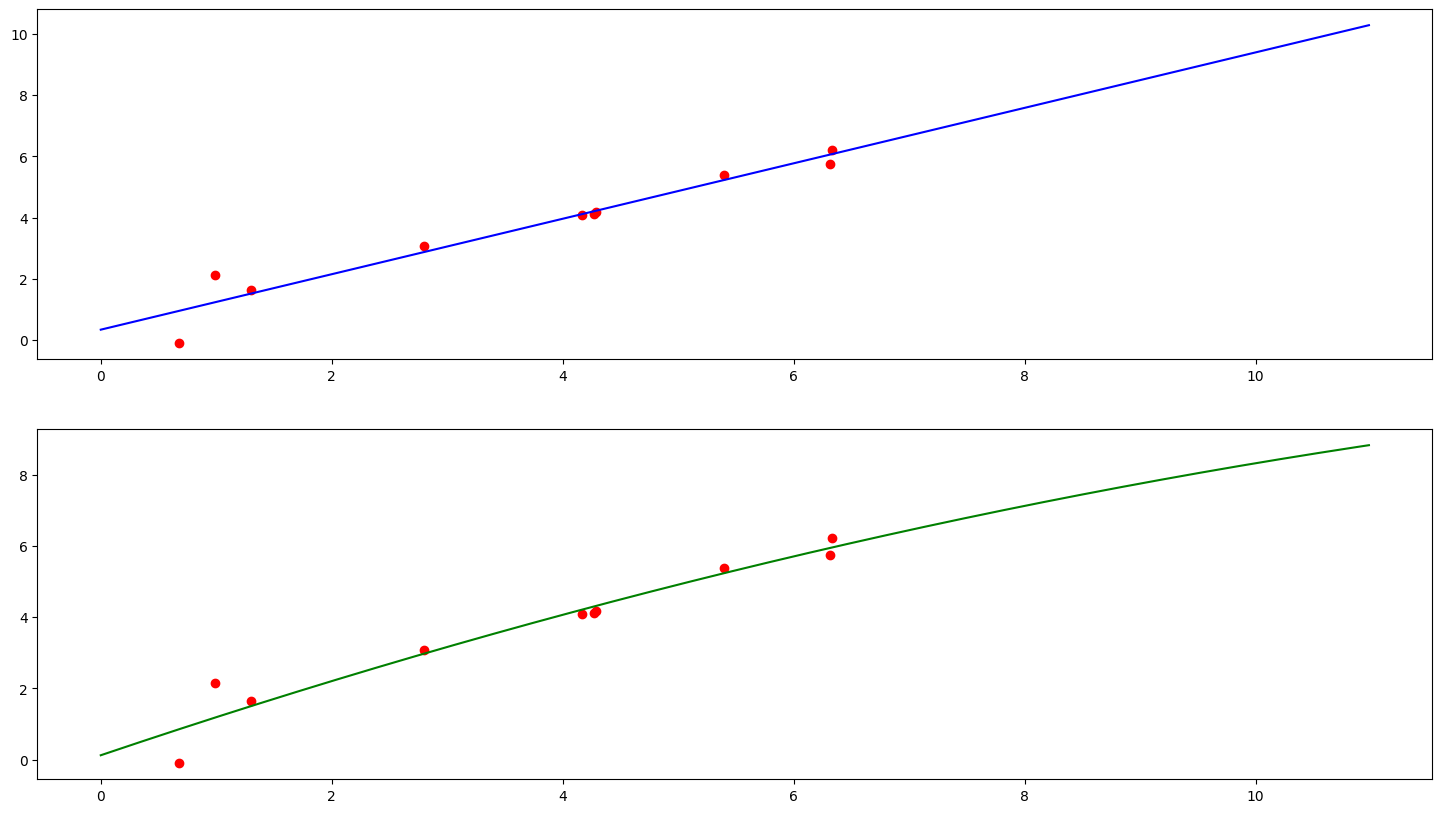

In [75]:
x_plots=np.arange(0,11,0.02)
fig, ax = plt.subplots(2, figsize=(18, 10))

ax[0].plot(x,y, 'ro')
ax[1].plot(x,y, 'ro')

ax[0].plot(x_plots,a*x_plots+b, '-b')
ax[1].plot(x_plots,a2*x_plots*x_plots+b2*x_plots+c2, '-g')

In [ ]:
#Compare the models